# Project Title:

### Predicting Employee Attrition Using Machine Learning Algorithms

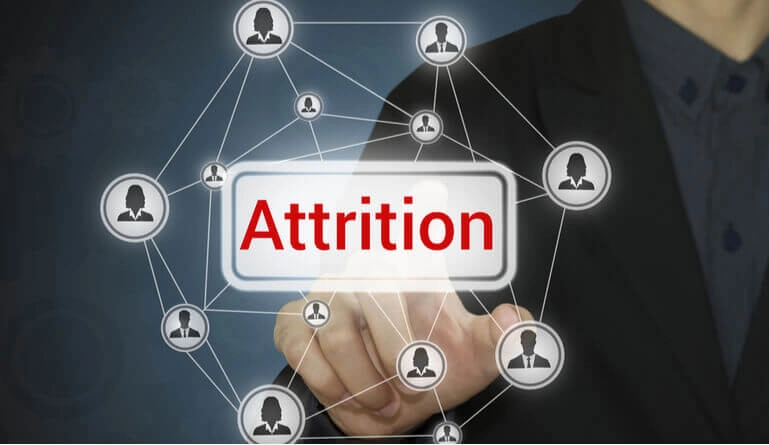

Attrition poses a significant threat to organizational stability, capable of swiftly undermining even the most successful enterprises in surprisingly short periods. The process of hiring new employees is a complex endeavor demanding substantial capital, time, and expertise. 

[The costs associated with onboarding new employees](https://www.investopedia.com/financial-edge/0711/the-cost-of-hiring-a-new-employee.aspx) extend far beyond mere salary payments, encompassing recruitment expenses, training investments, benefits, and more. 
- In 2019, small companies expended an average of over $1,500 per employee on training alone. 

- Integrating a new hire into the organizational framework also necessitates additional time and financial resources, with companies often taking up to six months or longer to recoup their investment. 

Recognizing these challenges, this project endeavors to develop a Machine Learning Model for predicting employee attrition by employing various algorithms. 

# Business Understanding

## Introduction

Abercrombie Corporation, a mid-sized marketing firm, is facing a notable increase in employee attrition rates, prompting concerns within the Human Resources (HR) department. To address this issue effectively, the HR team aims to implement predictive analytics to forecast employee attrition. By leveraging historical data and machine learning algorithms, Abercrombie seeks to identify patterns and factors contributing to attrition, enabling proactive retention strategies to be developed. This project focuses on utilizing data-driven insights to predict employee turnover and mitigate attrition risks, ultimately fostering a more stable and engaged workforce.


## Objectives

The project objectives are as follows:

i. **Demographic Factors and Attrition**: Analyze the impact of demographic variables such as age, gender, and department on employee attrition. Determine whether certain demographic groups are more susceptible to attrition than others.

ii. **Job Characteristics and Attrition**: Explore the relationship between job-related factors such as job level, education, and performance rating, and employee turnover. Identify which job characteristics are associated with higher attrition rates.

iii. **Retention Strategy Insights**: Identify factors contributing to higher attrition rates, providing insights into potential retention strategies. Determine which factors, such as compensation or career growth opportunities, are critical for retaining employees.

iv. **Predictive Analytics for Attrition**: Develop predictive models using machine learning algorithms to forecast employee attrition. Evaluate the accuracy and effectiveness of these models in predicting attrition risks, and visualize their performance metrics.

v. **Model Deployment**: Deploy the best performing model as a web application for user interaction.


## Methodology

To achieve the project objectives, the following methodology will be followed:

i. **Data Collection**: Collect comprehensive historical data on employee demographics, job characteristics, and attrition status.


ii. **Data Preprocessing**: Clean and preprocess the dataset to handle missing values, outliers, and ensure data consistency. Additionally, address any class imbalances to prevent biases in subsequent analyses.


iii. **Exploratory Data Analysis (EDA)**: Conduct EDA to gain initial insights into the dataset and identify relevant patterns and trends.


iv. **Feature Engineering**: Select and engineer relevant features from the dataset to build predictive models for employee attrition.


v. **Model Development**: Implement machine learning algorithms such as Logistic Regression, Decision Trees, and Random Forest to develop predictive models for employee attrition.


vi. **Model Evaluation**: Evaluate the performance of predictive models using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.


vii. **Visualization of Results**: Visualize the results of the predictive models and key findings from the analysis using Pandas and Matplotlib, enabling stakeholders to interpret and understand the insights effectively.


By following this methodology, the project aims to provide Abercrombie Corporation with actionable insights and predictive capabilities to mitigate employee attrition risks and foster a more stable and engaged workforce.

# 1. Data Collection

The dataset used in this project was obtained from an SQL database, using Python libraries such as Pyodbc and Pandas, the data was queried and loaded into a pandas DataFrame. The connection to the database was established securely using environment variables stored in a **.env** file, containing server details, database name, username, and password. After retrieving the data, the connection to the database was closed for security purposes. The DataFrame was then ready for analysis, containing information on employee attributes such as age, daily rate, department, and attrition status.

## Setup

In [1]:
#%pip install termcolor
#%pip install --upgrade pip

### Importation of Relevant Libraries

In [2]:
# Data Handling
import numpy as np
import pandas as pd
import pyodbc
from dotenv import dotenv_values

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing 
from imblearn.over_sampling import RandomOverSampler

# Machine Learning Modeling
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

# Miscellaneous
from termcolor import colored

# Model Saving
import pickle

# Other Packages
import warnings

warnings.filterwarnings("ignore")

### Load Dataset from SQL Database

In [3]:
# Load environment variables from the .env file into a dictionary
environment_vars = dotenv_values('.env')

# Get the credential values from the '.env' file 
server = environment_vars.get("SERVER")
database = environment_vars.get("DATABASE")
username = environment_vars.get("USERNAME")
password = environment_vars.get("PASSWORD")

# Create the connection string using the ODBC driver format
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Establish the connection using the connection string
conn = pyodbc.connect(conn_str)

In [4]:
# Query the database to retrieve the data
query = 'SELECT * FROM HR_Employee_Attrition'
df = pd.read_sql(query, conn)

In [5]:
# Close connection
conn.close()

In [6]:
# Display the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Save the DataFrame to a CSV file
df.to_csv('attrition_data.csv', index=False)

In [8]:
# The shape of the dataset
df.shape

(1470, 35)

The dataset contains 1470 rows and 35 columns. This information is valuable for understanding the size and dimensions of the dataset.

In [9]:
# Column information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   bool  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of a mix of numerical (int64), boolean (bool), and object (string) data types.

- The dataset consists of 1470 entries and 35 columns.
- Columns include features such as age, daily rate, distance from home, education level, job satisfaction, monthly income, years at company, etc.
- There are a mix of numerical (int64) and categorical (object) columns, along with two boolean columns for "Attrition" and "OverTime".

In [10]:
# Investigate the column names of the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Show the dataset summary statistics.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


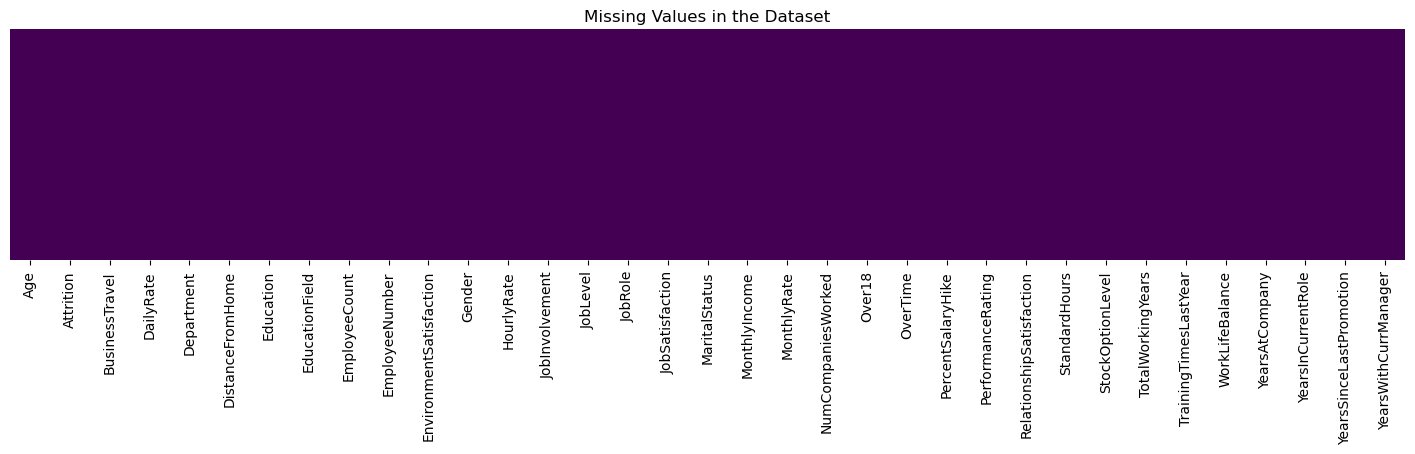

Missing Value Counts:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Missing Value Counts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Confirmation check for missing values in the dataset
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(18, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

# Display missing value counts as a DataFrame
print("Missing Value Counts:")
print('===' * 18)
missing_values_df = pd.DataFrame({'Missing Value Counts': missing_values})
missing_values_df_transposed = missing_values_df.transpose()
missing_values_df_transposed

In [13]:
# Check for duplicates in the dataset
df_duplicates = df[df.duplicated()]

# Display the duplicate rows in the dataset, if any
if not df_duplicates.empty:
    print("Duplicate Rows in Dataset:")
    display(df_duplicates)  # Display the duplicated dataframe
else:
    print("No Duplicate Rows in Dataset")

No Duplicate Rows in Dataset


In [14]:
# Get a list of all column names except "Attrition"
other_columns = [col for col in df.columns if col != 'Attrition']

# Reorder the DataFrame columns with "Attrition" at the end
df = df[other_columns + ['Attrition']]
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,True
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,False
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,True
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,False
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,False


In [15]:
# Calculate the Percentage of Attrition vs No-attrition Cases
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
attrition_percentage = attrition_percentage.round(2)

# Create a DataFrame
attrition_df = pd.DataFrame({'Attrition Type': attrition_percentage.index,
                         'Percentage': attrition_percentage.values})

# Display the DataFrame
attrition_df

,Attrition Type,Percentage
0,False,83.88
1,True,16.12


In [16]:
# Distribution counts of the target variable.
df['Attrition'].value_counts()

False    1233
True      237
Name: Attrition, dtype: int64

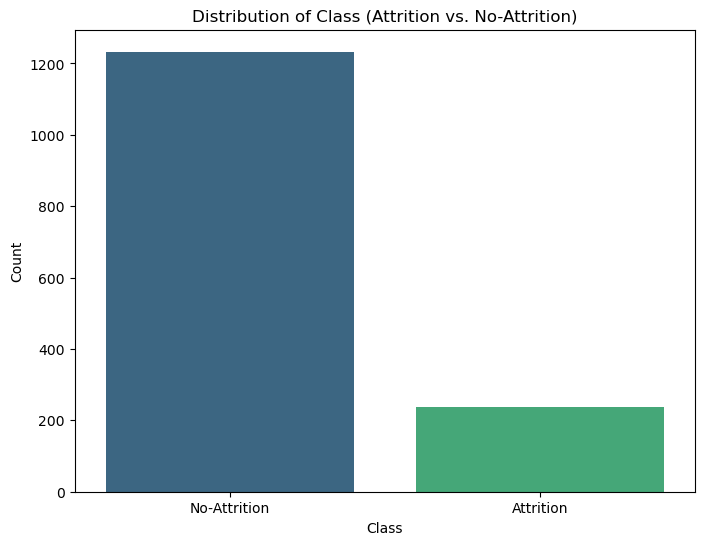

In [17]:
# Distribution counts of the target variable
class_counts = df['Attrition'].value_counts()

# Create count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Distribution of Class (Attrition vs. No-Attrition)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No-Attrition', 'Attrition'])
plt.show()

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the dataset
# Replace 'JobSatisfaction' and 'Attrition' with the actual column names from your dataset
observed_freq = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

# Print the contingency table
print("Contingency Table:")
contingency_table

Contingency Table:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
False,122,40,197,97,135,78,245,269,50
True,9,12,62,5,10,2,47,57,33


In [25]:
# Perform chi-square test
chi2, p_value, dof, expected_freq = chi2_contingency(observed_freq)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected_freq)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant association between job satisfaction and attrition.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between job satisfaction and attrition.")


Chi-Square Statistic: 17.505077010348
P-value: 0.0005563004510387556
Degrees of Freedom: 3
Expected Frequencies:
 [[242.40612245  46.59387755]
 [234.85714286  45.14285714]
 [370.73877551  71.26122449]
 [384.99795918  74.00204082]]
Reject the null hypothesis.
There is a significant association between job satisfaction and attrition.


# Feature Engineering

In [18]:
# Confirm column names
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [19]:
# Check unique values of the categorical columns in the dataset using a for loop 
categorical_columns = df.select_dtypes(include=['object','bool']).columns

for column in categorical_columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))
    print('==='*35)

Column: BusinessTravel - Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Column: Department - Unique Values: ['Sales' 'Research & Development' 'Human Resources']
Column: EducationField - Unique Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Column: Gender - Unique Values: ['Female' 'Male']
Column: JobRole - Unique Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Column: MaritalStatus - Unique Values: ['Single' 'Married' 'Divorced']
Column: Over18 - Unique Values: ['Y']
Column: OverTime - Unique Values: [ True False]
Column: Attrition - Unique Values: [ True False]


In [20]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount','PerformanceRating', 'MaritalStatus', 'Education', 'EducationField', 
         'TotalWorkingYears', 'YearsInCurrentRole', 'YearsInCurrentRole', 'MonthlyRate','DailyRate', 'JobInvolvement',
         'HourlyRate', 'YearsAtCompany','StockOptionLevel', 'BusinessTravel', 'DistanceFromHome', 'JobLevel', 'Gender'],axis=1,inplace=True)

In [21]:
# Check the remaining columns
df.columns

Index(['Age', 'Department', 'EnvironmentSatisfaction', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [22]:
# Column information the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   EnvironmentSatisfaction   1470 non-null   int64 
 3   JobRole                   1470 non-null   object
 4   JobSatisfaction           1470 non-null   int64 
 5   MonthlyIncome             1470 non-null   int64 
 6   NumCompaniesWorked        1470 non-null   int64 
 7   OverTime                  1470 non-null   bool  
 8   PercentSalaryHike         1470 non-null   int64 
 9   RelationshipSatisfaction  1470 non-null   int64 
 10  TrainingTimesLastYear     1470 non-null   int64 
 11  WorkLifeBalance           1470 non-null   int64 
 12  YearsSinceLastPromotion   1470 non-null   int64 
 13  YearsWithCurrManager      1470 non-null   int64 
 14  Attrition               

In [23]:
# Copy the DataFrame
train_data = df.copy()

# Save it as a CSV named train_data.csv
train_data.to_csv('train_data.csv', index=False)

## Extract the target column and drop it from the dataset

In [24]:
# Extract the target column
target_df = df['Attrition']
target_df = pd.DataFrame(target_df)
target_df.head()

,Attrition
0,True
1,False
2,True
3,False
4,False


In [25]:
# Drop it from the train dataset
df = df.drop('Attrition', axis=1)
df.head()

,Age,Department,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Sales,2,Sales Executive,4,5993,8,True,11,1,0,1,0,5
1,49,Research & Development,3,Research Scientist,2,5130,1,False,23,4,3,3,1,7
2,37,Research & Development,4,Laboratory Technician,3,2090,6,True,15,2,3,3,0,0
3,33,Research & Development,4,Research Scientist,3,2909,1,True,11,3,3,3,3,0
4,27,Research & Development,1,Laboratory Technician,2,3468,9,False,12,4,3,3,2,2


## Balancing the dataset

In [26]:
# Check the class distribution in the training set
print("Class distribution before balancing:")
print(target_df.value_counts())

Class distribution before balancing:
Attrition
False        1233
True          237
dtype: int64


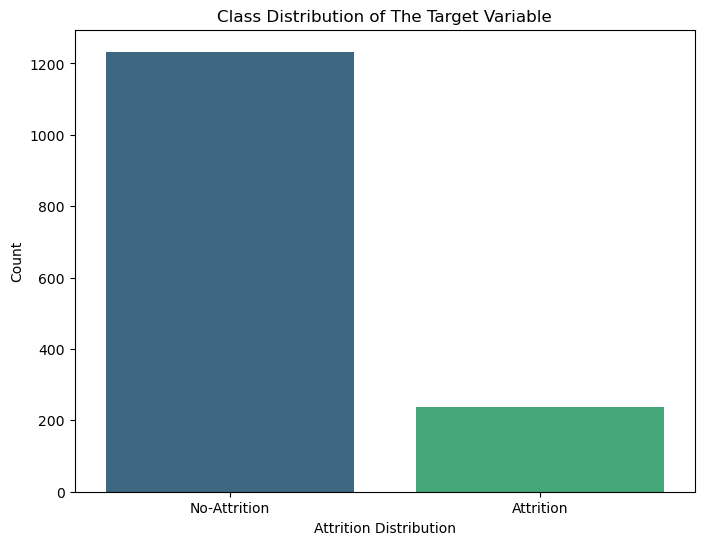

In [27]:
# Count the occurrences of each class in the dataset
class_counts = target_df['Attrition'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Attrition Distribution')
plt.ylabel('Count')
plt.xticks([False, True], ['No-Attrition', 'Attrition'])
plt.title('Class Distribution of The Target Variable')
plt.show()

In [28]:
# Balance the training set using Random Oversampling
oversampler = RandomOverSampler(random_state=42)
df_balanced, target_df_balanced = oversampler.fit_resample(df, target_df)

# Check the class distribution after balancing
balanced_class_counts = target_df_balanced.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Attrition
False        1233
True         1233
dtype: int64


In [29]:
df_balanced.shape

(2466, 14)

In [30]:
target_df_balanced.shape

(2466, 1)

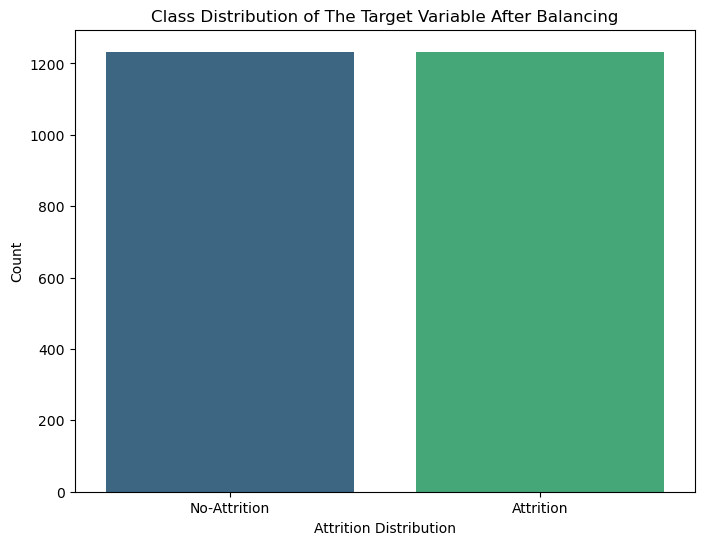

In [31]:
# Count the occurrences of each class in the balanced dataset
class_counts = target_df_balanced['Attrition'].value_counts()

# Create a bar plot with the 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Attrition Distribution')
plt.ylabel('Count')
plt.xticks([False, True], ['No-Attrition', 'Attrition'])
plt.title('Class Distribution of The Target Variable After Balancing')
plt.show()

The dataset is now balanced.

In [32]:
# Map the Attrition column to 0 for False and 1 for True
target_df_balanced['Attrition'] = target_df_balanced['Attrition'].map({False: 0, True: 1})
target_df_balanced.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


# Modelling

## i. Splitting The Train and Test into the X and y variables

In [33]:
# Define the training features (X) and target variable (y)
X = df_balanced
y = target_df_balanced['Attrition']

# Split the data into a training set and an evaluation set (i.e., 80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (1972, 14) (1972,)
Shape of the Evaluation Set (X_eval, y_eval): (494, 14) (494,)


In [34]:
X_train.head()

,Age,Department,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
2358,31,Research & Development,4,Research Scientist,3,4084,1,False,12,1,2,1,7,7
434,31,Research & Development,3,Manufacturing Director,2,10648,1,False,25,4,6,4,0,8
1101,32,Research & Development,4,Research Scientist,2,5878,3,False,12,1,2,3,2,5
567,34,Sales,4,Sales Executive,4,6274,1,False,22,3,5,3,1,4
545,30,Sales,3,Sales Executive,4,5304,7,False,23,4,2,2,7,7


In [35]:
y_train.head()

2358    1
434     0
1101    0
567     0
545     0
Name: Attrition, dtype: int64

In [36]:
X_eval.head()

,Age,Department,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
1623,25,Sales,3,Sales Representative,4,1118,1,True,14,4,4,3,1,0
169,32,Research & Development,3,Research Scientist,3,3038,3,False,20,1,2,3,1,4
2057,20,Sales,4,Sales Representative,4,2323,1,True,14,2,3,3,0,2
1817,33,Sales,1,Sales Executive,1,8224,0,True,17,1,3,3,0,3
160,22,Research & Development,3,Research Scientist,4,2323,1,False,24,1,6,3,2,2


In [37]:
y_eval.head()

1623    1
169     0
2057    1
1817    1
160     0
Name: Attrition, dtype: int64

In [38]:
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (1972, 14) (1972,)
Shape of the Evaluation Set (X_eval, y_eval): (494, 14) (494,)


## Model Training and Evaluation

### i. CatBoost Classifier
In the context of our income prediction problem, we have encountered a dataset with numerous categorical features, some of which have a large number of unique values. This can pose challenges in terms of encoding and model performance. To address these issues, we have opted for CatBoost, an open-source boosting library developed by Yandex. Here's why we've chosen CatBoost as our modeling solution:

1. **Automatic Categorical Feature Handling:** CatBoost offers a unique advantage by automatically handling categorical features. Unlike traditional models that require extensive feature encoding using techniques like One-Hot Encoding or Label Encoding, CatBoost can directly work with categorical data. This simplifies the preprocessing step and ensures that we can utilize our categorical features without manual intervention.


2. **Handling Missing Values:** CatBoost excels in handling missing values. It utilizes an algorithm called Symmetric Weighted Quantile Sketch (SWQS) to automatically manage missing data. This not only simplifies the preprocessing process but also reduces the risk of overfitting, contributing to improved overall model performance.


3. **Streamlined Feature Scaling:** Another benefit of CatBoost is its built-in feature scaling. It takes care of scaling all columns uniformly, saving us the effort of manually converting columns. This helps streamline the data preparation phase.


4. **Built-in Cross-Validation:** CatBoost includes a built-in cross-validation method, simplifying the task of selecting the best hyperparameters for our model. This ensures that our model's performance is optimized without the need for extensive manual tuning.


5. **Regularization Techniques:** CatBoost supports both L1 and L2 regularization methods. These techniques are valuable for reducing overfitting and enhancing the model's ability to generalize well to unseen data.


By choosing CatBoost, we aim to efficiently address the challenges posed by our dataset, particularly the extensive set of categorical features with many unique values. CatBoost not only simplifies the modeling process but also enhances the model's performance. It's a robust solution for our income prediction problem.

In [39]:
# We will convert categorical columns to string data type and capture the indices where string datatype is present. 
# These indices will be used for the CatBoost model.

# Selecting object data type columns (categorical columns) in the training dataset
cat_cols_index = np.where(df_balanced.dtypes == 'object')[0]
print("The indices of the categorical columns are:")
print(cat_cols_index)
print()


for i in range(len(X_train.columns)):
    if i in cat_cols_index:
        X_train[X_train.columns[i]] = X_train[X_train.columns[i]].astype(str)
        X_eval[X_train.columns[i]] = X_eval[X_train.columns[i]].astype(str)

# Initialize the CatBoostClassifier model
model = CatBoostClassifier(random_state=42, n_estimators=50)

# Fit the CatBoost model on the training data with categorical features specified
catboost_model = model.fit(X_train, y_train, cat_features=cat_cols_index)

The indices of the categorical columns are:
[1 3]

Learning rate set to 0.214735
0:	learn: 0.6443393	total: 247ms	remaining: 12.1s
1:	learn: 0.6086618	total: 306ms	remaining: 7.35s
2:	learn: 0.5811328	total: 404ms	remaining: 6.33s
3:	learn: 0.5590296	total: 481ms	remaining: 5.53s
4:	learn: 0.5385754	total: 543ms	remaining: 4.89s
5:	learn: 0.5214778	total: 626ms	remaining: 4.59s
6:	learn: 0.5078047	total: 759ms	remaining: 4.66s
7:	learn: 0.4946019	total: 825ms	remaining: 4.33s
8:	learn: 0.4829245	total: 884ms	remaining: 4.03s
9:	learn: 0.4727954	total: 950ms	remaining: 3.8s
10:	learn: 0.4639493	total: 1.02s	remaining: 3.6s
11:	learn: 0.4567427	total: 1.09s	remaining: 3.47s
12:	learn: 0.4490042	total: 1.15s	remaining: 3.27s
13:	learn: 0.4354060	total: 1.21s	remaining: 3.12s
14:	learn: 0.4282723	total: 1.37s	remaining: 3.19s
15:	learn: 0.4202628	total: 1.69s	remaining: 3.59s
16:	learn: 0.4133887	total: 1.81s	remaining: 3.52s
17:	learn: 0.4081422	total: 2.1s	remaining: 3.73s
18:	learn: 0.4

In [40]:
# Use the trained CatBoost model to make predictions on the evaluation set
y_pred_eval = catboost_model.predict(X_eval)

# Calculate the accuracy on the evaluation set
accuracy = accuracy_score(y_pred_eval, y_eval)

# Print the accuracy with a colored text message
print(colored(f'The accuracy attained on the validation set is {accuracy:.2%}', 'green', attrs=['bold']))

The accuracy attained on the validation set is 86.64%


The classification report only on the validation data:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       247
           1       0.84      0.91      0.87       247

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



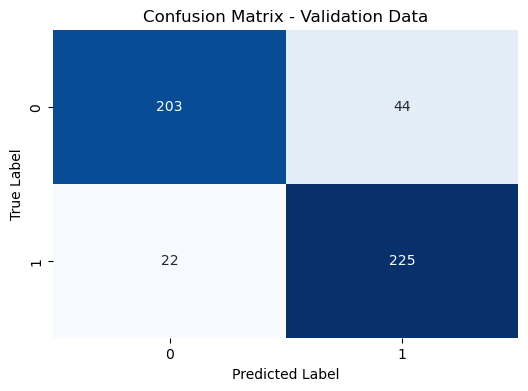

The classification report only on the train data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       986
           1       0.89      0.92      0.90       986

    accuracy                           0.90      1972
   macro avg       0.90      0.90      0.90      1972
weighted avg       0.90      0.90      0.90      1972



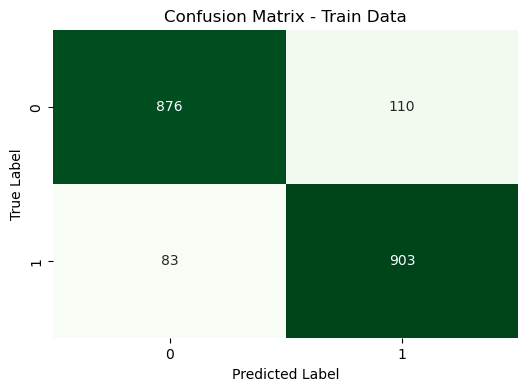

In [41]:
# Classification report and confusion matrix for the validation data
print('The classification report only on the validation data:')
print(colored(classification_report(y_eval, model.predict(X_eval)), 'blue', attrs=['bold']))

# Calculate the confusion matrix for validation data
cm_eval = confusion_matrix(y_eval, model.predict(X_eval))

# Plot confusion matrix for validation data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report and confusion matrix for the train data
print('The classification report only on the train data:')
print(colored(classification_report(y_train, model.predict(X_train)), 'green', attrs=['bold']))

# Calculate the confusion matrix for train data
cm_train = confusion_matrix(y_train, model.predict(X_train))

# Plot confusion matrix for train data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The classification report for the validation data:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       247
           1       0.77      0.95      0.85       247

    accuracy                           0.84       494
   macro avg       0.85      0.84      0.83       494
weighted avg       0.85      0.84      0.83       494



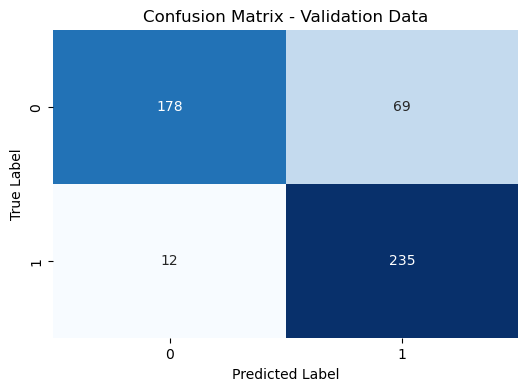



The classification report for the train data:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       986
           1       0.85      0.97      0.90       986

    accuracy                           0.90      1972
   macro avg       0.90      0.90      0.89      1972
weighted avg       0.90      0.90      0.89      1972



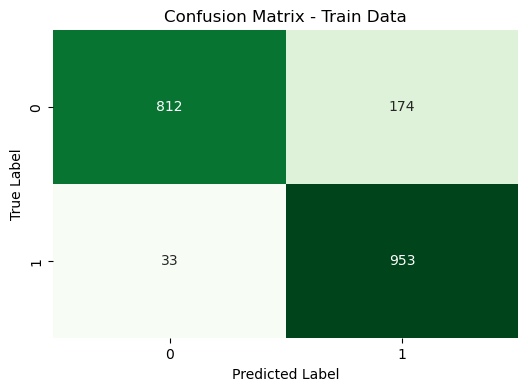

In [42]:
# Model Evaluation
thresh = 0.4
train_pred = np.where(model.predict_proba(X_train)[:, 1] > thresh, 1, 0)
test_pred = np.where(model.predict_proba(X_eval)[:, 1] > thresh, 1, 0)

# Classification report and confusion matrix for the validation data
print('The classification report for the validation data:')
print(colored(classification_report(y_eval, test_pred), 'blue', attrs=['bold']))

# Calculate the confusion matrix for validation data
cm_eval = confusion_matrix(y_eval, test_pred)

# Plot confusion matrix for validation data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('===' * 20)
print('\n')

# Classification report and confusion matrix for the train data
print('The classification report for the train data:')
print(colored(classification_report(y_train, train_pred), 'green', attrs=['bold']))

# Calculate the confusion matrix for train data
cm_train = confusion_matrix(y_train, train_pred)

# Plot confusion matrix for train data
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
# Get feature importances from the trained CatBoost model
feature_importances = catboost_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance_df

,Feature,Importance
7,OverTime,14.649682
5,MonthlyIncome,11.874053
13,YearsWithCurrManager,11.751868
0,Age,8.871181
2,EnvironmentSatisfaction,8.137680
6,NumCompaniesWorked,7.211641
4,JobSatisfaction,6.744826
8,PercentSalaryHike,5.310380
3,JobRole,5.137292
12,YearsSinceLastPromotion,4.872238


In [44]:
# Extract and store the unique values
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

unique_values

{'Age': array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
        24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
        58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EnvironmentSatisfaction': array([2, 3, 4, 1], dtype=int64),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'JobSatisfaction': array([4, 2, 3, 1], dtype=int64),
 'MonthlyIncome': array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64),
 'NumCompaniesWorked': array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64),
 'OverTime': array([ True, False]),
 'PercentSalaryHike': array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
       dtype=int64),
 'RelationshipSat

In [45]:
#Save unique values and model together in a single pickle file
file_path = 'model_and_key_components.pkl'

# Create a dictionary to store the components
saved_components = {
    'model': catboost_model,
    'unique_values': unique_values
}

# Save all components in a single pickle file
with open(file_path, 'wb') as file:
    pickle.dump(saved_components, file)